#0617

#### 판다스 내장 그래프 도구
Pandas는 Matplotlib 라이브러리의 기능을 일부 내장하고 있어서 별도로 임포트하지 않고 간단히 그래프를 그릴 수 있습니다. 다양한 종류의 그래프를 그릴 수 있으며, 각 그래프는 데이터를 시각화하는 데 유용한 정보를 제공합니다.
- 선 그래프 (Line Plot) :
가장 기본적인 선 그래프를 그리며, 시간에 따른 데이터 변화를 시각화하는 데 유용합니다.
- 막대 그래프 (Bar Plot) :
카테고리형 데이터를 시각화하는 데 유용합니다.
- 수평 막대 그래프 (Horizontal Bar Plot) :
카테고리형 데이터를 수평으로 시각화하며, 누적 옵션과 투명도 적용이 가능합니다.
- 히스토그램 (Histogram) :
데이터의 분포를 시각화하는 데 유용합니다.
- 산점도 (Scatter Plot) :
두 변수 간의 관계를 시각화하며, 상관관계를 확인할 수 있습니다.
- 박스 플롯 (Box Plot) :
데이터의 분포와 분산 정도를 시각화하며, 이상치(outliers)를 확인하는 데 유용합니다.
- 면적 그래프 (Area Plot)
면적 그래프는 시간에 따른 데이터의 변화를 누적하여 시각화하는 데 유용합니다. 여러 시계열 데이터를 하나의 플롯에 그릴 수 있으며, 누적된 값의 변화를 시각적으로 쉽게 파악할 수 있습니다.
- 파이 차트 (Pie Chart) :
카테고리형 데이터의 비율을 시각화하는 데 유용합니다.
- 커널 밀도 추정 그래프 (KDE Plot) :
데이터의 확률 밀도 함수를 시각화하며, 데이터의 분포를 부드럽게 나타냅니다.

탐색을 위한 목적의 그래프는 외워서 바로 적용할 수 있게 연습

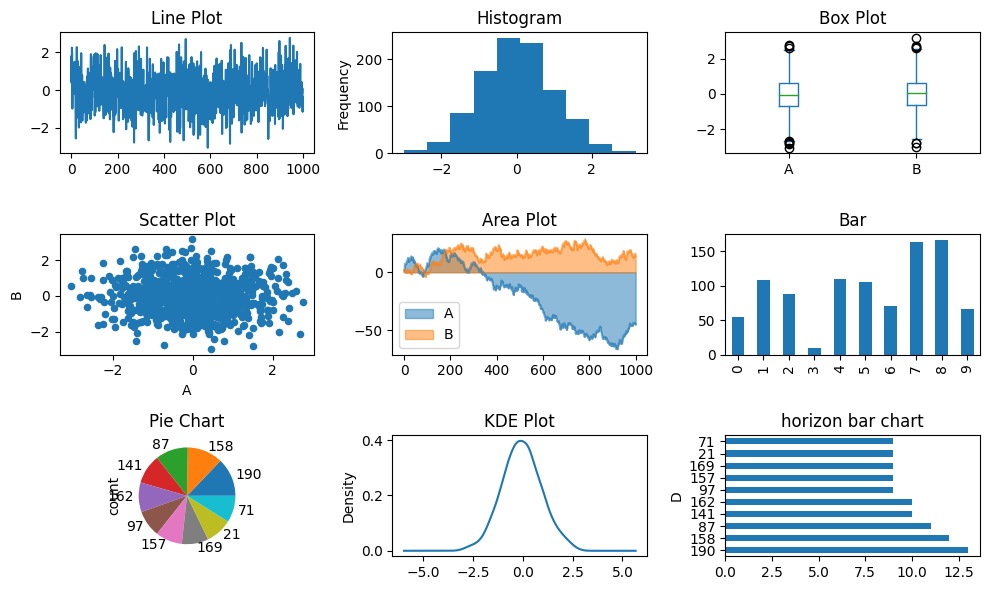

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)
df = pd.DataFrame({
    'A': np.random.randn(1000),
    'B': np.random.randn(1000),
    'C': np.random.rand(1000) * 100,
    'D': np.random.randint(1, 200,1000)
})

fig, axes = plt.subplots(3, 3, figsize=(10, 6))
#디폴트가 라인 그래프
df['A'].plot(ax=axes[0, 0], title='Line Plot')

df['B'].plot(ax=axes[0, 1], kind='hist', title='Histogram')

df[['A', 'B']].plot(ax=axes[0, 2], kind='box', title='Box Plot')

df.plot(kind='scatter', x='A', y='B', ax=axes[1, 0], title='Scatter Plot')
#면적 그래프(stacket=False 두시리즈가 겹치지 않게 하는 옵션)
df[['A','B']].cumsum().plot(kind='area', ax=axes[1, 1], title='Area Plot', stacked=False)
#막대그래프 상위10개
df['D'].head(10).plot(kind='bar', ax=axes[1,2], title='Bar' )
#파이 그래프
df['D'].value_counts().head(10).plot(kind='pie', ax=axes[2,0], title='Pie Chart')
#커널 밀도 추정 그래프
df['A'].plot(kind='kde', ax=axes[2, 1], title='KDE Plot')
#수평 막대 그래프
df['D'].value_counts().head(10).plot(kind='barh', ax=axes[2,2], title='horizon bar chart')
#레이아웃 조정
plt.tight_layout()
plt.show()

Q. 평균0, 표준편차1인 표준정규분포 난수 10000개로 데이터프레임 생성

       data
0  1.828739
1  0.630298
2  0.971986
3  0.816713
4  0.780795
               data
count  10000.000000
mean      -0.013002
std        1.005513
min       -3.870659
25%       -0.684603
50%       -0.021828
75%        0.660376
max        3.806471
Axes(0.125,0.11;0.775x0.77)


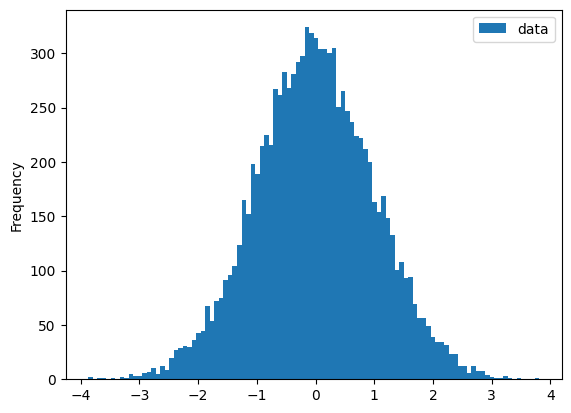

In [ ]:
#샘플은 돈
#모집단을 반영하는 샘플이어야함.

data = np.random.randn(10000)
df = pd.DataFrame({'data': data})
print(df.head())
print(df.describe())
print(df.plot(kind='hist', bins=100))

       data
0 -0.783156
1 -1.008093
2  1.411418
3  0.034595
4 -1.013859
                 data
count  1000000.000000
mean         0.001565
std          0.999973
min         -4.995573
25%         -0.671681
50%          0.002625
75%          0.676368
max          4.521540
Axes(0.125,0.11;0.775x0.77)


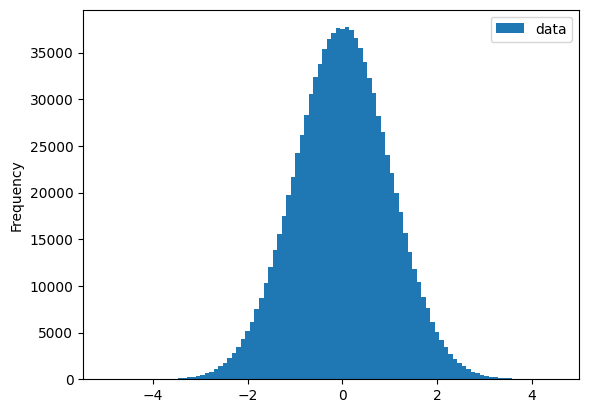

In [ ]:
data = np.random.randn(1000000)
df = pd.DataFrame({'data': data})
print(df.head())
print(df.describe())
print(df.plot(kind='hist', bins=100))

           0
0  13.248691
1   8.776487
2   8.943656
3   7.854063
4  11.730815
                  0
count  10000.000000
mean      10.019545
std        1.997672
min        2.687120
25%        8.674150
50%       10.016908
75%       11.343618
max       18.053698


<Axes: ylabel='Frequency'>

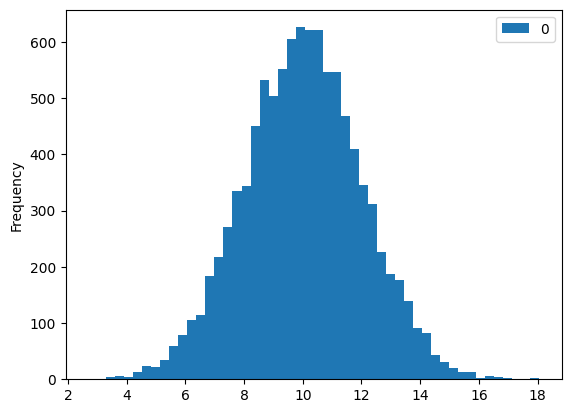

In [ ]:
#평균10, 표준편차2 샘플 10000

from scipy import stats
np.random.seed(1)
sample1 = stats.norm.rvs(loc=10, scale=2, size=10000)
df1 = pd.DataFrame(sample1)
print(df1.head())
print(df1.describe())
df1.plot(kind='hist', bins=50)

In [ ]:
#0,1 사이의 균일분포에서 6행4열 난수 추출
df = pd.DataFrame(np.random.rand(6,4),
                  index = ['one','two','three','four','five','six'],
                  columns = list('ABCD'))
print(df.head())

              A         B         C         D
one    0.865081  0.032853  0.933223  0.267461
two    0.124448  0.340698  0.765585  0.090553
three  0.310120  0.890913  0.894145  0.270737
four   0.335384  0.077759  0.169704  0.280080
five   0.314396  0.789679  0.982823  0.394681


<Axes: >

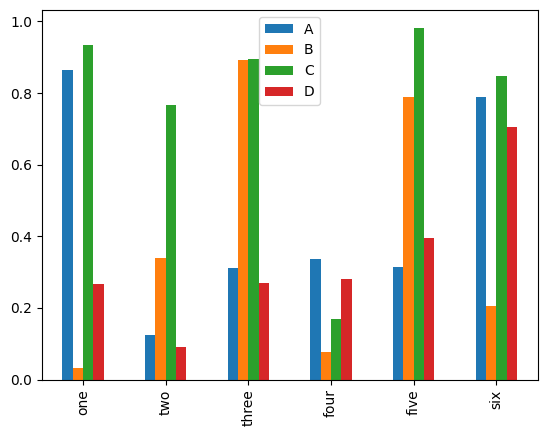

In [ ]:
df.plot(kind='bar')

<Axes: >

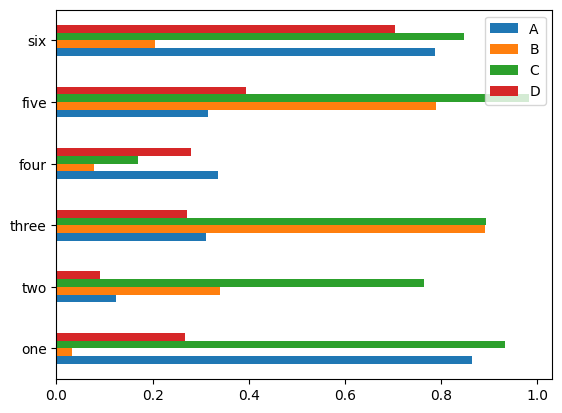

In [ ]:
df.plot(kind='barh')

<Axes: >

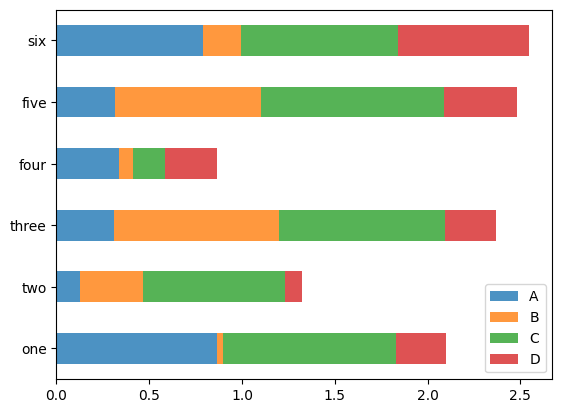

In [ ]:
df.plot(kind='barh', stacked=True, alpha=0.8)

Q. 아래 df에 대하여 수직 막대 그래프, 수평막대 그래프, 수직 스택막대 그래프, 스평 스택막대 그래프를 작성하세요.

In [ ]:
df = pd.DataFrame(np.random.rand(8,3),
                  index = ['p1','p2','p3','p4','p5','p6','p7','p8'],
                  columns = list('ABC'))

In [ ]:
df

,A,B,C
p1,0.919122,0.169110,0.929848
p2,0.150823,0.135593,0.995470
p3,0.842857,0.680344,0.843496
p4,0.041681,0.404026,0.581456
p5,0.670009,0.621954,0.871499
p6,0.552468,0.834455,0.384325
p7,0.890471,0.171193,0.309035
p8,0.148954,0.712060,0.927528


<Axes: >

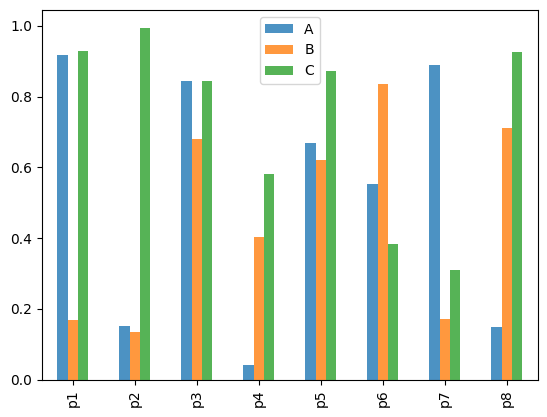

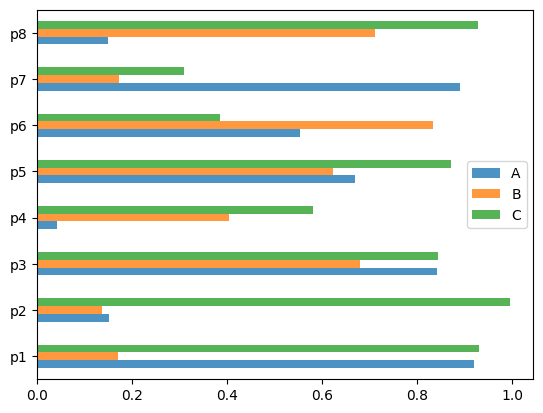

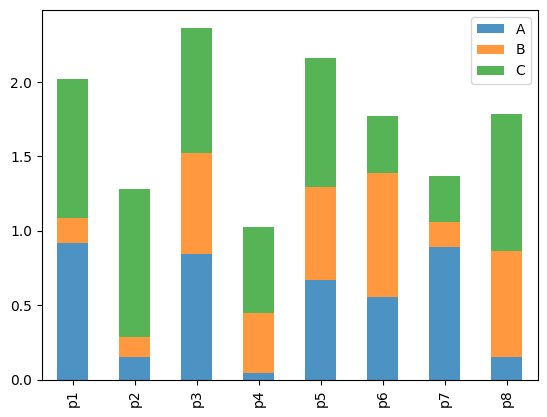

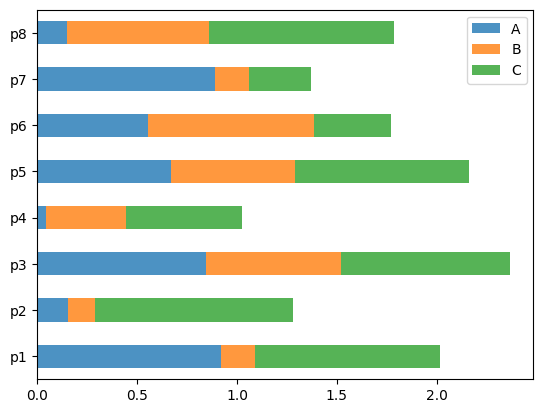

In [ ]:
df.plot(kind='bar', stacked=False, alpha=0.8)
df.plot(kind='barh', stacked=False, alpha=0.8)
df.plot(kind='bar', stacked=True, alpha=0.8)
df.plot(kind='barh', stacked=True, alpha=0.8)



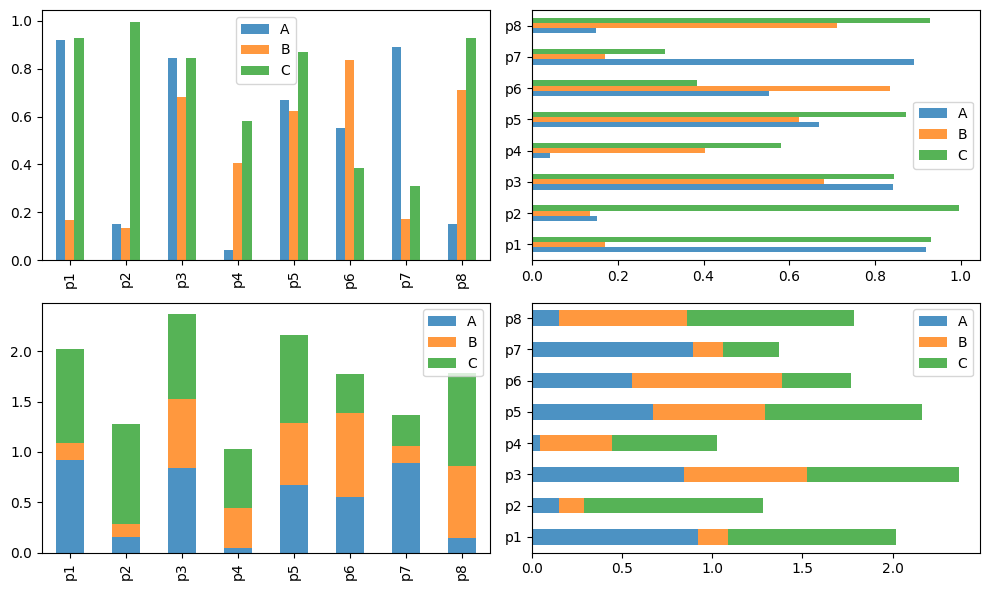

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

df.plot(ax=axes[0,0],kind='bar', stacked=False, alpha=0.8)
df.plot(ax=axes[0,1],kind='barh', stacked=False, alpha=0.8)
df.plot(ax=axes[1,0],kind='bar', stacked=True, alpha=0.8)
df.plot(ax=axes[1,1],kind='barh', stacked=True, alpha=0.8)
plt.tight_layout()
plt.show()

<Axes: >

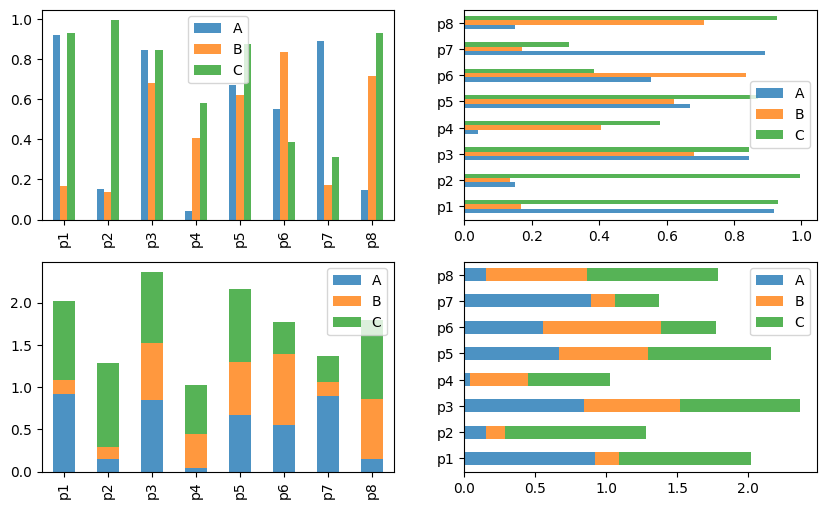

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

df.plot(ax=axes[0,0],kind='bar', stacked=False, alpha=0.8)
df.plot(ax=axes[0,1],kind='barh', stacked=False, alpha=0.8)
df.plot(ax=axes[1,0],kind='bar', stacked=True, alpha=0.8)
df.plot(ax=axes[1,1],kind='barh', stacked=True, alpha=0.8)

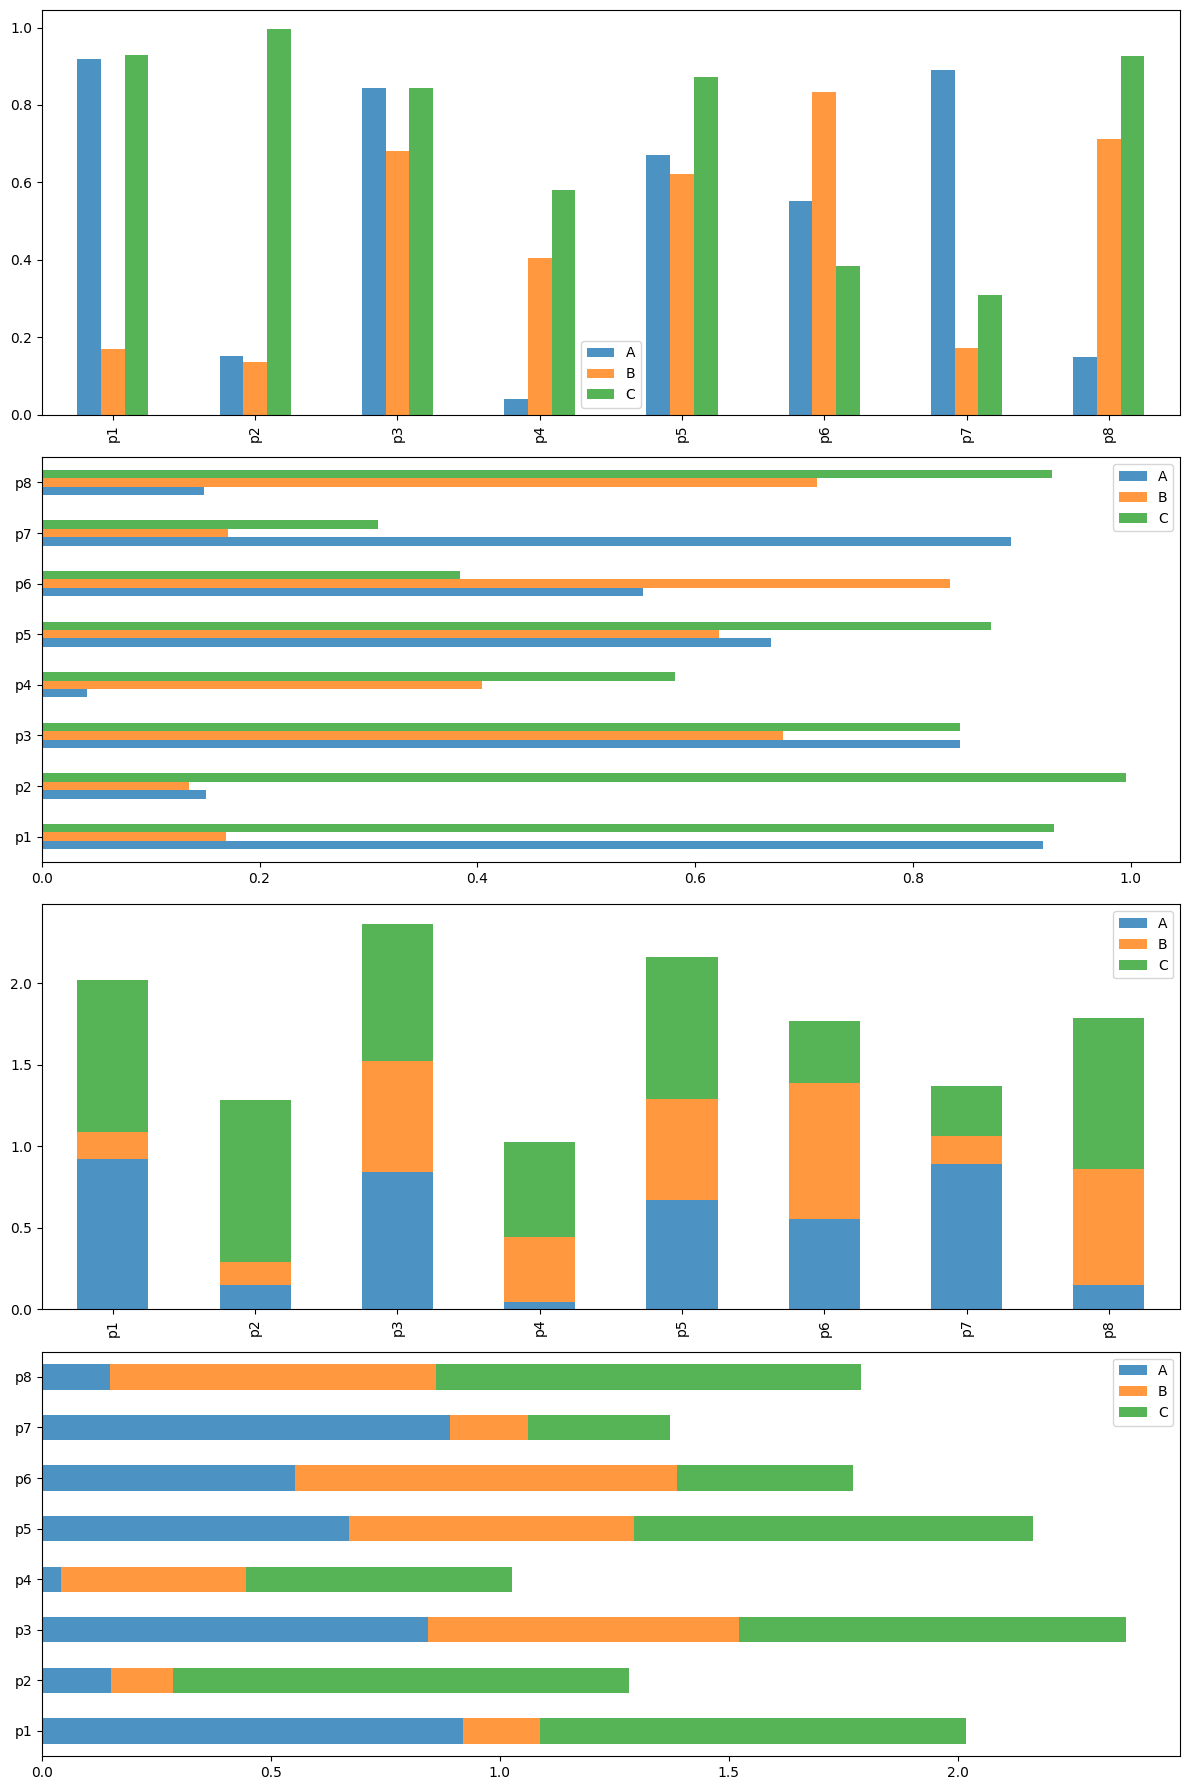

In [ ]:
#subplot(nrows=4,ncols=1,figsize(12,18))
fig, axes = plt.subplots(nrows=4,ncols=1,figsize=(12,18))

df.plot(ax=axes[0],kind='bar', stacked=False, alpha=0.8)
df.plot(ax=axes[1],kind='barh', stacked=False, alpha=0.8)
df.plot(ax=axes[2],kind='bar', stacked=True, alpha=0.8)
df.plot(ax=axes[3],kind='barh', stacked=True, alpha=0.8)
plt.tight_layout()
plt.show()

<Axes: >

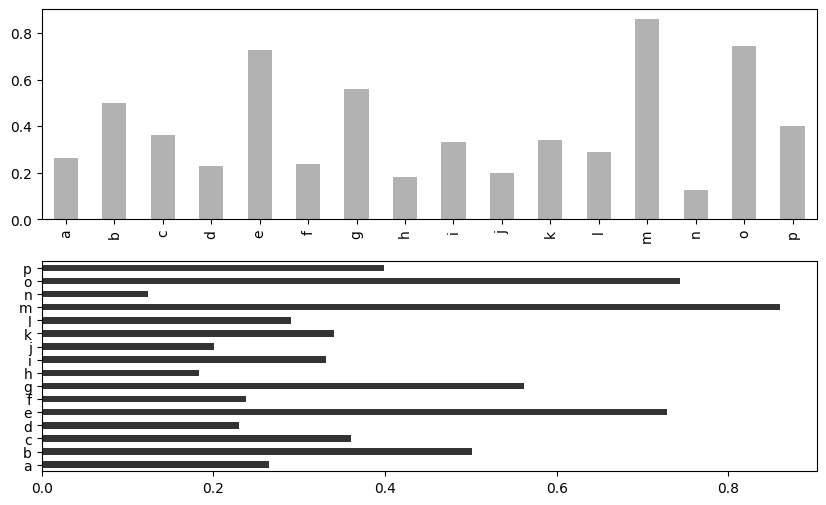

In [ ]:
fig, axes = plt.subplots(2,1, figsize=(10, 6))

data = pd.Series(np.random.rand(16) , index=list('abcdefghijklmnop'))
data.plot(ax=axes[0],kind='bar', color= 'k',stacked=False, alpha=0.3)
data.plot(ax=axes[1],kind='barh', color= 'k',stacked=False, alpha=0.8)

## matplotlib
- histogram : plt.hist(x, bins= )
- line plot : plt.plot(x,y)
- plt.bar(x,y, width= , color='')
- scatter plot : plt.scatter(x, y):

## seaborn
- sns.distplot(data, bins=, color=, kde=), histplot, displot으로 변경
- sns.boxplot(x, y, data, color)
- sns.violinplot(x, y, data, color)
- sns.barplot(x, y, data, color)
- sns.jointplot(x, y, data, color)
- sns.pairplot(data, hue, palette)
- sns.lmplot(x,y,data,color)
- sns.regplot(x,y,data,fig_reg=False)
- sns.heatmap(data,)

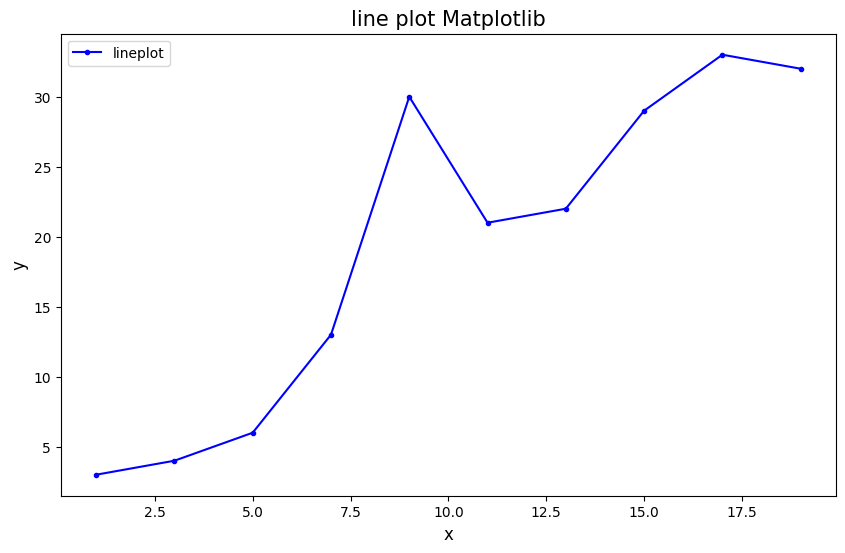

In [ ]:
x = np.arange(1,21,2)
y = np.array([3,4,6,13,30,21,22,29,33,32])
plt.figure(figsize=(10,6))
plt.plot(x,y, color='blue', marker='o', markersize=3)
plt.title('line plot Matplotlib', size=15)
plt.xlabel('x', size=12)
plt.ylabel('y', size=12)
plt.legend(labels=['lineplot'])
plt.show()

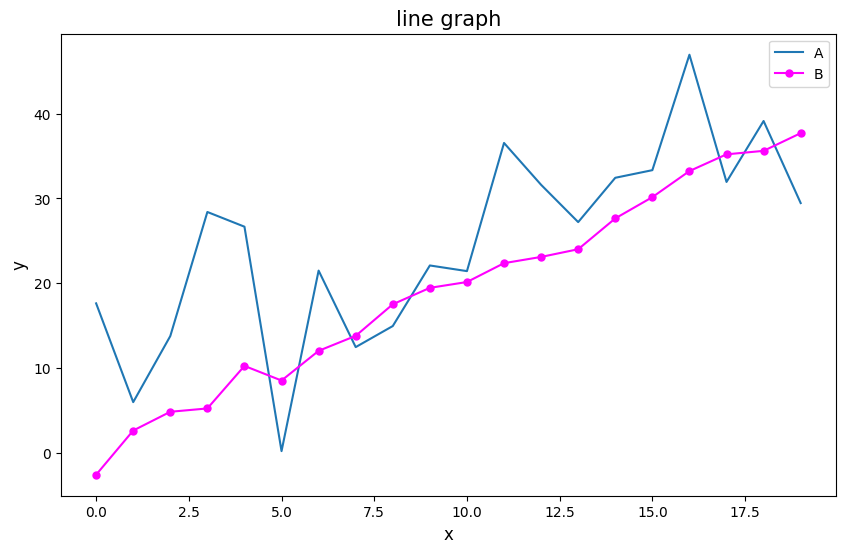

In [ ]:
np.random.seed(0)
x = np.arange(20)
y1 = np.arange(20)*2 + np.random.randn(20) * 10
y2 = np.arange(20)*2 + np.random.randn(20)
plt.figure(figsize=(10,6))
plt.plot(x,y1)
plt.plot(x,y2, color='magenta', marker='o', markersize=5)
plt.xlabel('x', size=12)
plt.ylabel('y', size=12)
plt.title('line graph', size=15)
plt.legend(labels=['A','B'])

range(0, 10)
[8 5 7 6 3 4 6 5 6 8]


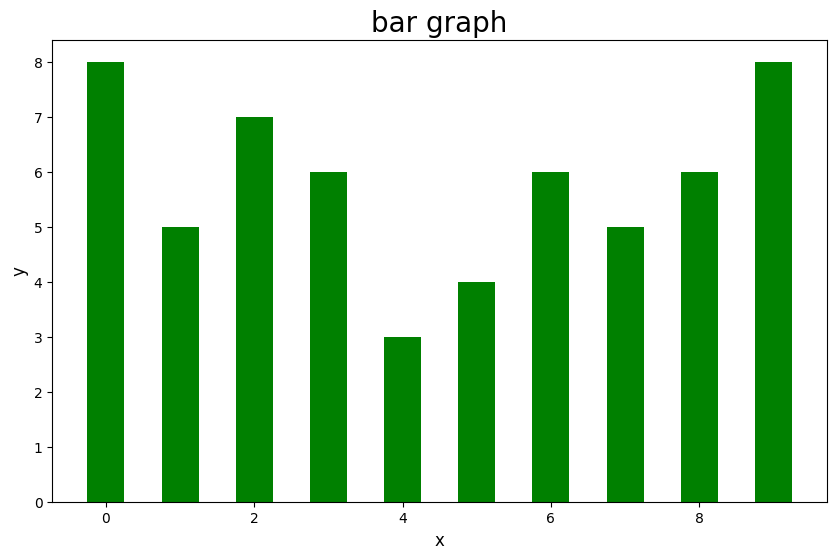

In [ ]:
#np.random.randint(2,10,) 10 제외
y = np.random.randint(2,10, 10)
x = range(len(y))
print(x)
print(y)
plt.figure(figsize=(10,6))
plt.bar(x,y, width=0.5, color='green')
plt.xlabel('x', size=12)
plt.ylabel('y', size=12)
plt.title('bar graph', size=20)
plt.show()

range(0, 10)
[6 9 9 6 5 6 6 6 2 8]


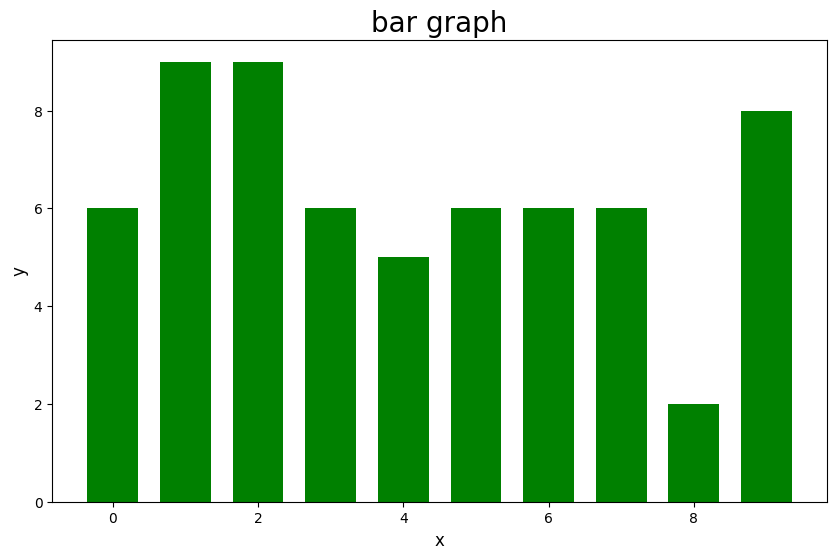

In [ ]:
#np.random.randint(2,10,) 10 제외
y = np.random.randint(2,10, 10)
x = range(len(y))
print(x)
print(y)
plt.figure(figsize=(10,6))
plt.bar(x,y, width=0.7, color='green')
plt.xlabel('x', size=12)
plt.ylabel('y', size=12)
plt.title('bar graph', size=20)
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Text(0, 0.5, 'weight')

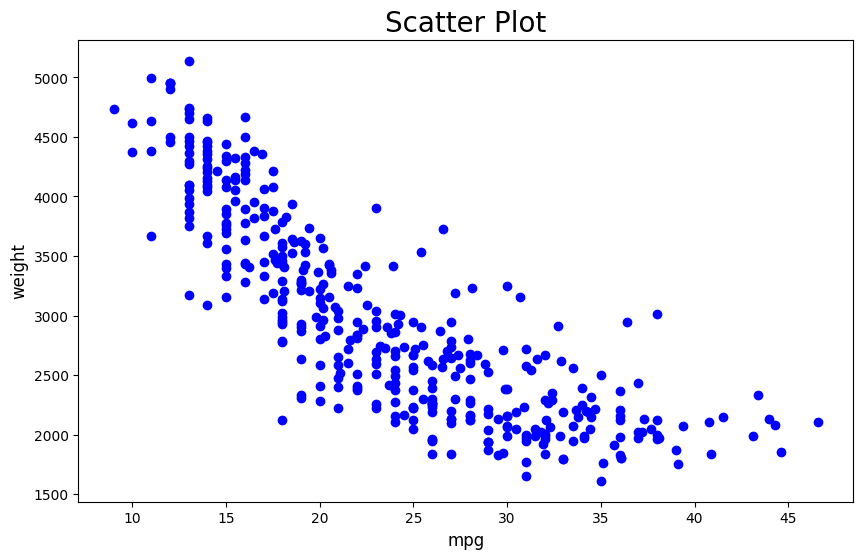

In [ ]:
df_auto = pd.read_excel('auto-mpg (1).xlsx')
x = df_auto.mpg
y = df_auto.weight
plt.figure(figsize=(10,6))
plt.scatter(x,y, color='blue')
plt.title('Scatter Plot', size=20)
plt.xlabel('mpg', size=12)
plt.ylabel('weight', size=12)

Text(0, 0.5, 'weight')

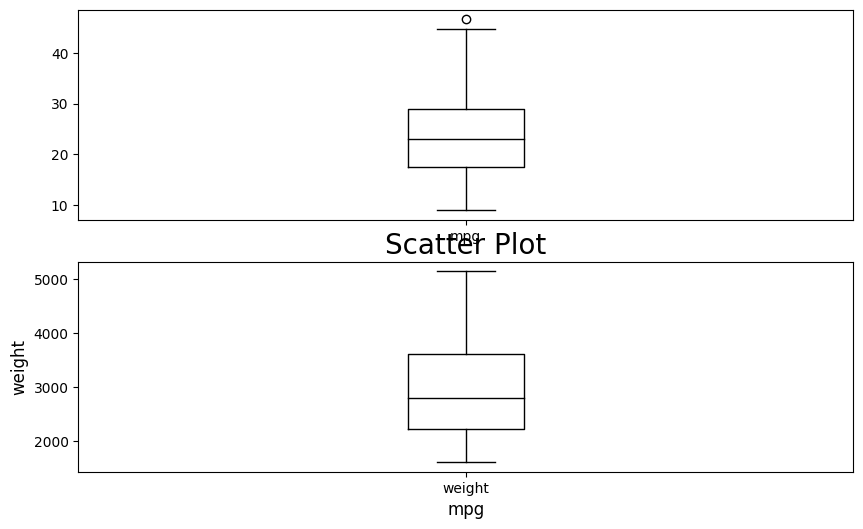

In [ ]:
fig, axes = plt.subplots(2,1, figsize=(10, 6))

df_auto.mpg.plot(ax=axes[0],kind='box', color= 'k')
df_auto.weight.plot(ax=axes[1],kind='box', color= 'k')

# x = df_auto.mpg
# y = df_auto.weight
# plt.figure(figsize=(10,6))
# plt.scatter(x,y, color='blue')
plt.title('Scatter Plot', size=20)
plt.xlabel('mpg', size=12)
plt.ylabel('weight', size=12)

{'whiskers': [<matplotlib.lines.Line2D at 0x7adeb935a560>,
 'caps': [<matplotlib.lines.Line2D at 0x7adeb9381a80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7adeb9381720>],
 'medians': [<matplotlib.lines.Line2D at 0x7adeb9381fc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7adeb9382260>],
 'means': []}

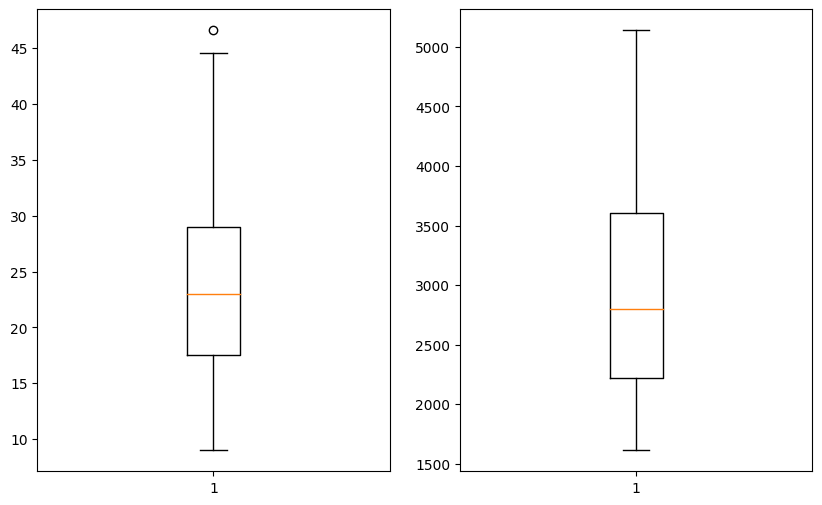

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.boxplot(df_auto.mpg)
plt.subplot(1,2,2)
plt.boxplot(df_auto.weight)

Text(0.5, 1.0, 'weight')

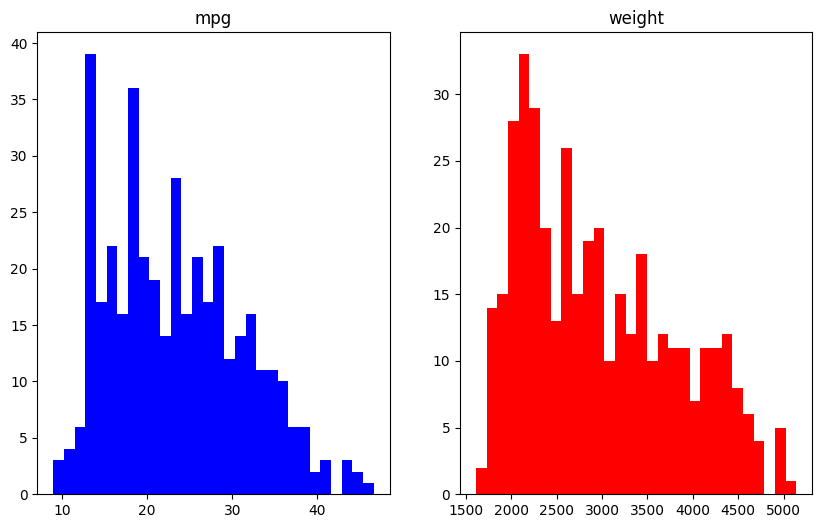

In [ ]:
x = df_auto.mpg
y = df_auto.weight
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.hist(x, bins=30, color='blue')
plt.title('mpg')
plt.subplot(1,2,2)
plt.hist(y, bins=30, color='red')
plt.title('weight')

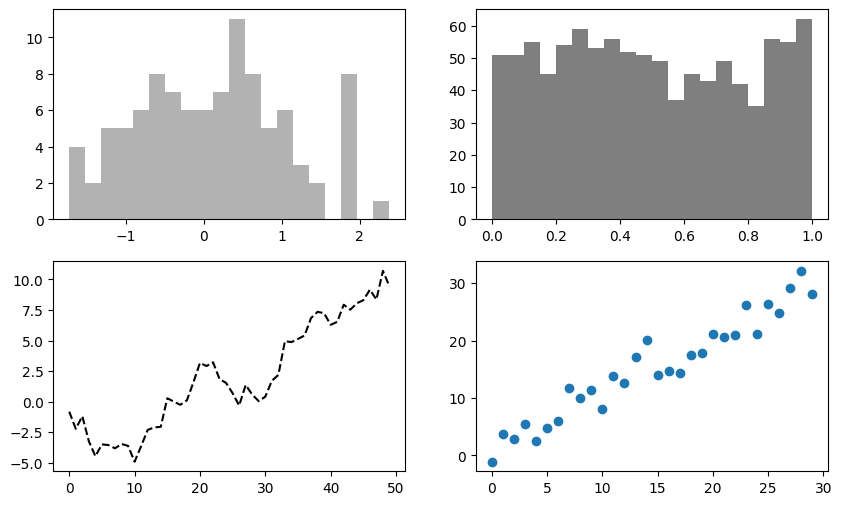

In [ ]:
# 축에 대한 객체 만들고 .그래프종류

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

x = np.arange(1,21,2)
y = np.array([3,4,6,13,30,21,22,29,33,32])
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.hist(np.random.rand(1000), bins=20, color='k', alpha=0.5)
ax3.plot(np.random.randn(50).cumsum(),'k--')
ax4.scatter(np.arange(30), np.arange(30)+3*np.random.randn(30))

In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [ ]:
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


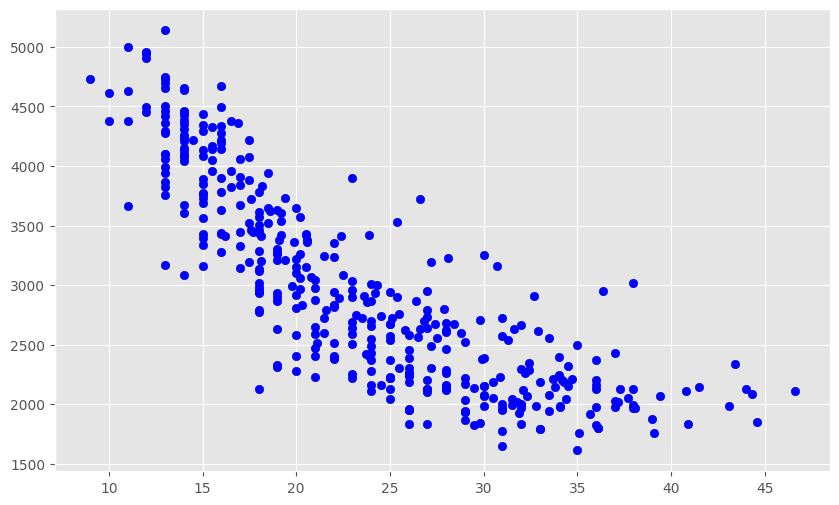

In [ ]:
plt.style.use('ggplot')
x = df_auto.mpg
y = df_auto.weight
plt.figure(figsize=(10,6))
plt.scatter(x,y, color='blue')
plt.grid(True)

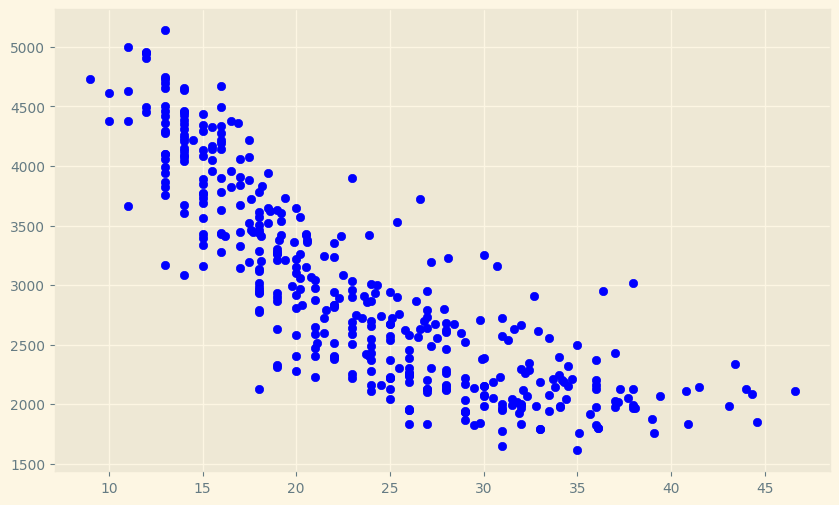

In [ ]:
plt.style.use('Solarize_Light2')
x = df_auto.mpg
y = df_auto.weight
plt.figure(figsize=(10,6))
plt.scatter(x,y, color='blue')
plt.grid(True)

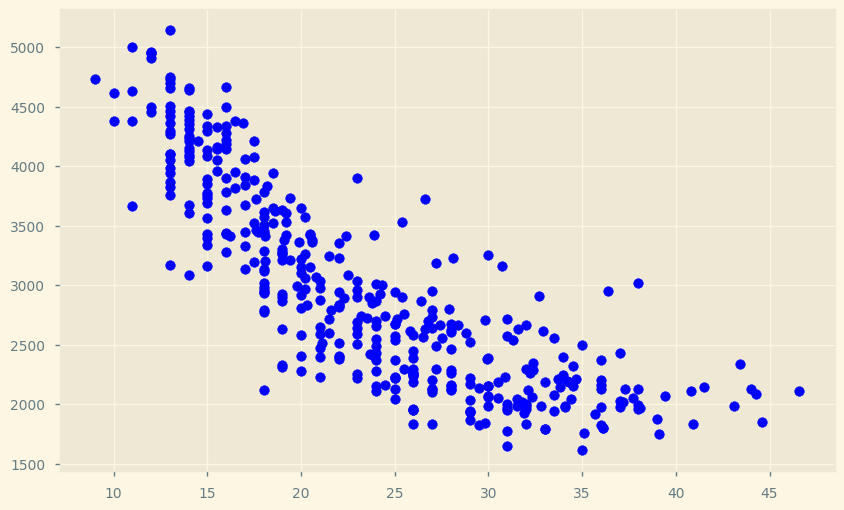

In [ ]:
plt.style.use('seaborn-v0_8-notebook')
x = df_auto.mpg
y = df_auto.weight
plt.figure(figsize=(10,6))
plt.scatter(x,y, color='blue')
plt.grid(True)

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
import numpy as np

np.random.seed(0)
data = np.random.randn(1000)
cdata = data.cumsum()

Text(0, 0.5, 'Sum')

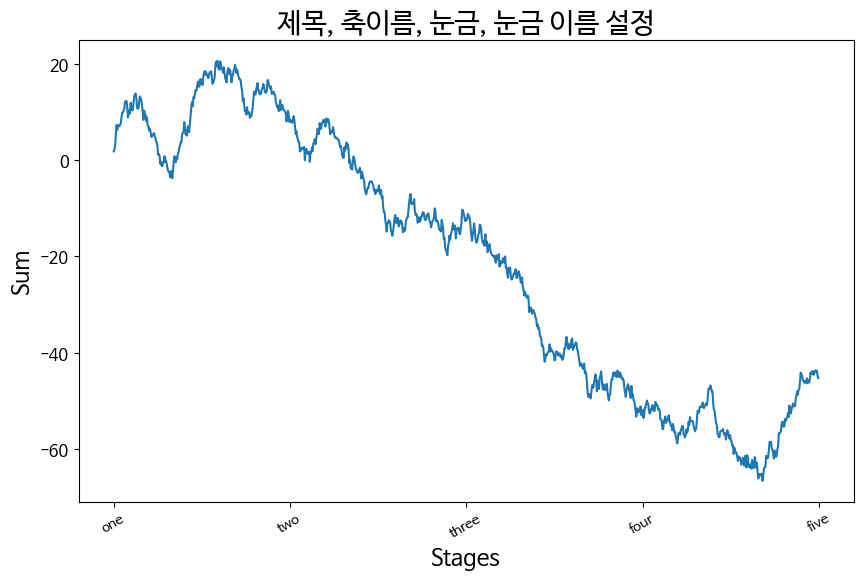

In [5]:
import matplotlib.pyplot as plt

plt.rc('font', size=12, family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(cdata)
ticks = ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels(['one','two','three','four','five'], rotation=30, fontsize='small')
ax.set_title('제목, 축이름, 눈금, 눈금 이름 설정', size=20)
ax.set_xlabel('Stages', size=16)
ax.set_ylabel('Sum', size=16)

#0618

Text(0, 0.5, 'Sum')

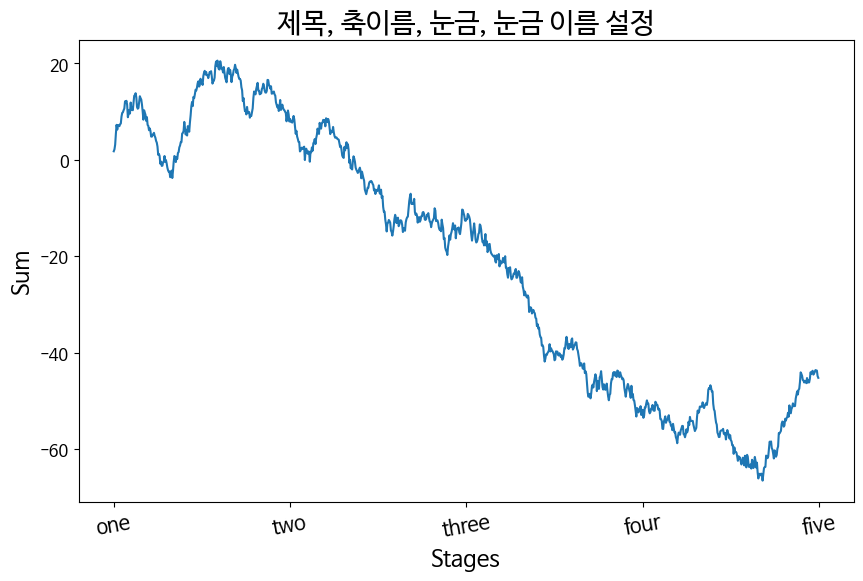

In [7]:
import matplotlib.pyplot as plt

plt.rc('font', size=12, family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(cdata)
ticks = ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels(['one','two','three','four','five'], rotation=10, fontsize='large')
ax.set_title('제목, 축이름, 눈금, 눈금 이름 설정', size=20)
ax.set_xlabel('Stages', size=16)
ax.set_ylabel('Sum', size=16)

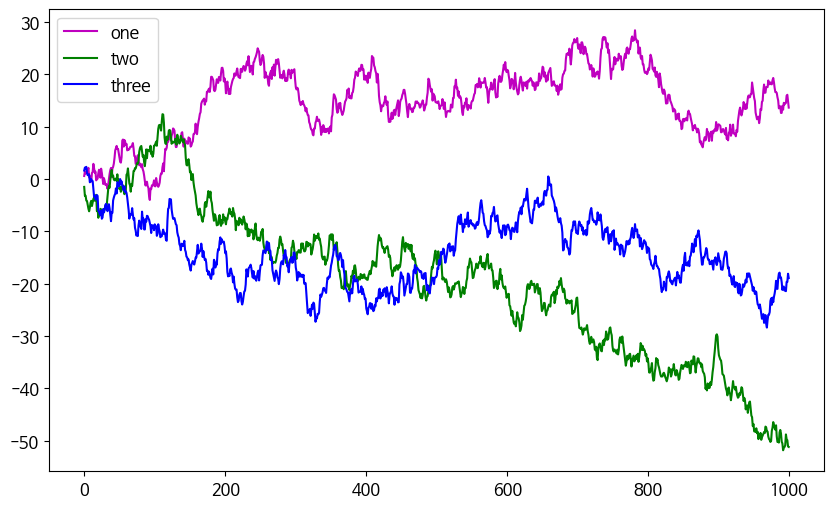

In [8]:
#범례 추가
from numpy.random import randn

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(), 'm',label='one')
ax.plot(randn(1000).cumsum(), 'g',label='two')
ax.plot(randn(1000).cumsum(), 'b',label='three')
plt.legend(loc='best')

Q. 카테고리별로 나뉘는 데이터를 생성하세요 (예: 다섯 가지 다른 과일의 판매량).
이 데이터를 사용하여 파이 차트를 그리세요.
파이 차트에서 각 섹션에 레이블을 추가하고, 한 섹션을 강조하세요 (예: 'explode' 기능 사용).
- sizes는 각 조각의 크기.
- explode는 위에서 정의된 'explode' 설정을 적용.
- labels는 각 조각에 대한 라벨을 지정.
- autopct='%1.1f%%'는 각 조각에 표시될 비율을 포맷합니다. 여기서 %1.1f%%는 소수점 한 자리까지 비율을 표시하라는 의미.
- shadow=True는 차트에 그림자를 추가.
- startangle=90는 첫 조각이 시작될 각도를 90도로 설정. 이는 차트가 위쪽에서 시작하도록 한다.

([<matplotlib.patches.Wedge at 0x780fa80cd210>,
 [Text(-0.42095177560159874, 1.0162674857624154, 'Apple'),
  Text(-1.2000000000000002, 1.469576158976824e-16, 'Bananas'),
  Text(0.420951775601599, -1.0162674857624154, 'Oranges'),
  Text(1.062518406696673, 0.28470095790278527, 'Grapes'),
  Text(0.549999970269512, 0.9526279613277873, 'Berries')],
 [Text(-0.22961005941905382, 0.5543277195067721, '12.5%'),
  Text(-0.7, 8.572527594031472e-17, '25.0%'),
  Text(0.229610059419054, -0.554327719506772, '37.5%'),
  Text(0.5795554945618215, 0.15529143158333739, '8.3%'),
  Text(0.29999998378337017, 0.5196152516333384, '16.7%')])

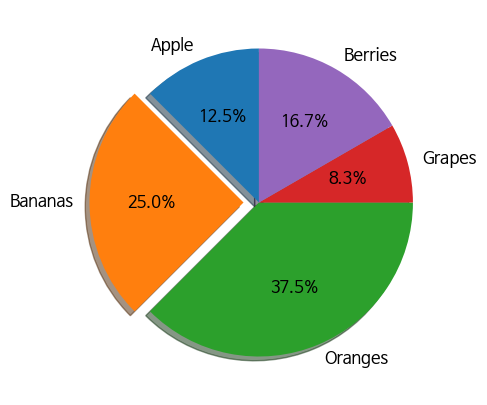

In [10]:
import matplotlib.pyplot as plt
labels = 'Apple','Bananas','Oranges','Grapes','Berries'
sizes = [15,30,45,10, 20]
explode = (0,0.1,0,0,0)
plt.figure(figsize=(5,5))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)

In [1]:
import seaborn as sns
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Q.age컬럼을 범주화 하여 파이 차트로 작성하세요
- 범주화: young(10), teen(20), adult(45), mature(60), elder(60+)

In [2]:
def age_cat(x):
    if x <= 10:
        return 'young'
    elif 10< x <= 20:
        return 'teen'
    elif 20< x <= 45:
        return 'adult'
    elif 45< x <= 60:
        return 'mature'
    else:
        return 'elder'

df['age_cat'] = df.age.apply(lambda x : age_cat(x))
df['age_cat']

0      adult
1      adult
2      adult
3      adult
4      adult
       ...  
886    adult
887     teen
888    elder
889    adult
890    adult
Name: age_cat, Length: 891, dtype: object

In [5]:
df['age_cat'].value_counts()

age_cat
adult     432
elder     199
teen      115
mature     81
young      64
Name: count, dtype: int64

In [4]:
df['age_cat'].value_counts()[1]

199

In [9]:
a = df['age_cat'].value_counts()
b = []
for i in a:
    b.append(i)

In [12]:
df.age_cat.sum()

'adultadultadultadultadulteldermatureyoungadultteenyoungmatureteenadultteenmatureyoungelderadultelderadultadultteenadultyoungadultelderteenelderelderadultelderelderelderadultadultelderadultteenteenadultadultelderyoungteenelderelderelderelderteenyoungadultmatureadultelderelderadultadultyoungteenadultadultadultyoungelderelderadultteenteenadultadultteenadultadultadultadultelderelderyoungadultadultadultelderadultteenadultteenelderadultadultadultteenmatureadultmatureelderelderadultadultadultadultelderadultadultadultadultadultelderadulteldermatureteenadultteenteenadultelderadultadultyoungadultelderadultadultmatureteenelderadultelderadultadultteenmatureadultadultadultteenadultteenadultelderadultadultteenteenteenadultyoungadultadultmatureadultmatureadulteldermatureteenadultelderelderadultadultadultteenyoungyoungelderadultelderadultelderyoungyoungadultmatureteeneldermatureadultadultelderelderyoungyoungyoungelderelderadultadultadultadultteenteenyoungadultmatureelderadultelderadultadultelderadult

In [14]:
tdf = df['age_cat'].value_counts().to_frame()
tdf

,count
age_cat,
adult,432
elder,199
teen,115
mature,81
young,64


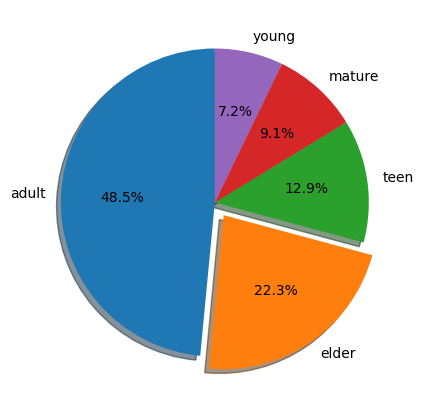

In [19]:
import matplotlib.pyplot as plt

tdf = df['age_cat'].value_counts().to_frame()
labels = tdf.index
sizes = tdf['count']
explode = (0,0.1,0,0,0)
plt.figure(figsize=(5,5))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()

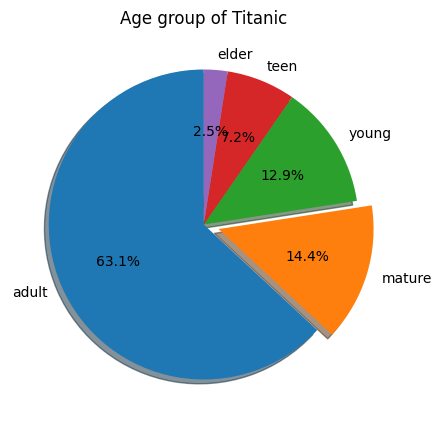

In [29]:
#ex
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

mean_age = df['age'].mean()
df['age'].fillna(mean_age, inplace=True)

df['age_group'] = pd.cut(df['age'], bins=[0,10,20, 40,60,np.inf], labels=['teen','young','adult','mature','elder'])
tdf = df['age_group'].value_counts()
labels = tdf.index
sizes = tdf.values
explode = (0,0.1,0,0,0)
plt.figure(figsize=(5,5))
plt.axis('equal')
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.title('Age group of Titanic')
plt.show()